# Defining and Training MLNN(Auto Associative)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
metric = {}
import random
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [2]:
def get_imageset(datadir):
    
    #converts the given images into numpy arrays that can be feeded into the perceptron
    images = sorted([img_name for img_name in os.listdir(datadir) if img_name!=".DS_Store"])
    matrix = np.array([np.array(Image.open(datadir+each_img).convert('L')) for each_img in images])
    matrix = np.where(matrix<np.mean(matrix),0,1).astype('float64')
    return matrix

In [3]:
os.listdir()

['.DS_Store',
 'imgset',
 'Trained_MLNN_auto.h5',
 'MLNN2mon.ipynb',
 '.ipynb_checkpoints',
 'graphs']

In [4]:
X_train = get_imageset("./imgset/train/")
X_test = get_imageset("./imgset/test/")
X_val = get_imageset("./imgset/val/")

print(X_train.shape,X_test.shape,X_val.shape,X_test.dtype,X_train.dtype,X_val.dtype)

(16, 16, 16) (33, 16, 16) (16, 16, 16) float64 float64 float64


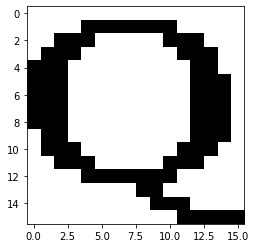

In [5]:
#Flattening the input data
X_train= X_train.reshape(X_train.shape[0],1,256)
X_test = X_test.reshape(X_test.shape[0],1,256)
X_val = X_val.reshape(X_val.shape[0],1,256)
plt.imshow(X_train[0].reshape(16,16),cmap="gray")

# MLNN definition

In [6]:
# Fully connected input layer with 256*256 weights
# Number of bias: 256
# Number of Output Nodes: 256

model = Sequential()
model.add(Dense(256,activation='sigmoid',input_shape=(1,256)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(256,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam')
# Diplay the model summary
print("model summary")
tensor_board = TensorBoard(log_dir='./graphs', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
print("Shapes of weights and bias arrays")
for x in range(0,1):
    print(model.get_layer(index=x).get_weights()[0].shape)
    print(model.get_layer(index=x).get_weights()[1].shape)
stop = EarlyStopping(monitor='loss', mode='min',patience=10,min_delta=0.0001) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 64)             16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1, 256)            16640     
Total params: 103,040
Trainable params: 103,040
Non-trainable params: 0
_

# MLNN Training and Testing

In [7]:
#Training the model
results = model.fit(X_train,X_train, 
                    validation_data=(X_val,X_val), 
                    epochs=1500,batch_size=4,callbacks=[stop,tensor_board])

Instructions for updating:
Use tf.cast instead.
Train on 16 samples, validate on 16 samples
Epoch 1/1500
16/16 [==============================] - 1s 88ms/step - loss: 0.2424 - val_loss: 0.2315
Epoch 2/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.2254 - val_loss: 0.2159
Epoch 3/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.2100 - val_loss: 0.2015
Epoch 4/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1959 - val_loss: 0.1886
Epoch 5/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1836 - val_loss: 0.1771
Epoch 6/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1728 - val_loss: 0.1676
Epoch 7/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1642 - val_loss: 0.1602
Epoch 8/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1574 - val_loss: 0.1547
Epoch 9/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1525 - val_loss: 0.1508
Epoch 1

Epoch 79/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1348 - val_loss: 0.1364
Epoch 80/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1357
Epoch 81/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1335 - val_loss: 0.1351
Epoch 82/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1327 - val_loss: 0.1346
Epoch 83/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1317 - val_loss: 0.1340
Epoch 84/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1309 - val_loss: 0.1334
Epoch 85/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1302 - val_loss: 0.1327
Epoch 86/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.1319
Epoch 87/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1282 - val_loss: 0.1312
Epoch 88/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.1271 - val_los

16/16 [==============================] - 0s 3ms/step - loss: 0.0860 - val_loss: 0.1074
Epoch 160/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0857 - val_loss: 0.1076
Epoch 161/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 0.1075
Epoch 162/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0857 - val_loss: 0.1072
Epoch 163/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0850 - val_loss: 0.1071
Epoch 164/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0848 - val_loss: 0.1072
Epoch 165/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0846 - val_loss: 0.1072
Epoch 166/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0841 - val_loss: 0.1072
Epoch 167/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0846 - val_loss: 0.1069
Epoch 168/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0842 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0710 - val_loss: 0.1058
Epoch 240/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0707 - val_loss: 0.1052
Epoch 241/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0708 - val_loss: 0.1044
Epoch 242/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0704 - val_loss: 0.1039
Epoch 243/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0700 - val_loss: 0.1039
Epoch 244/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0700 - val_loss: 0.1038
Epoch 245/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0700 - val_loss: 0.1038
Epoch 246/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.1042
Epoch 247/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.1047
Epoch 248/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0591 - val_loss: 0.1033
Epoch 320/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 0.1033
Epoch 321/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.0584 - val_loss: 0.1032
Epoch 322/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0586 - val_loss: 0.1033
Epoch 323/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0583 - val_loss: 0.1034
Epoch 324/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.1034
Epoch 325/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.1035
Epoch 326/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0578 - val_loss: 0.1033
Epoch 327/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0576 - val_loss: 0.1030
Epoch 328/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0576 - val_loss: 0

16/16 [==============================] - 0s 4ms/step - loss: 0.0470 - val_loss: 0.1013
Epoch 400/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0469 - val_loss: 0.1013
Epoch 401/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0468 - val_loss: 0.1014
Epoch 402/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0465 - val_loss: 0.1012
Epoch 403/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0467 - val_loss: 0.1010
Epoch 404/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.1010
Epoch 405/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0465 - val_loss: 0.1011
Epoch 406/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.1012
Epoch 407/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.1013
Epoch 408/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0458 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.0998
Epoch 480/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.0998
Epoch 481/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.0997
Epoch 482/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.0996
Epoch 483/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.0996
Epoch 484/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.0996
Epoch 485/1500
16/16 [==============================] - 0s 6ms/step - loss: 0.0359 - val_loss: 0.0994
Epoch 486/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.0991
Epoch 487/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.0990
Epoch 488/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0991
Epoch 560/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0991
Epoch 561/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0992
Epoch 562/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0995
Epoch 563/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0273 - val_loss: 0.0997
Epoch 564/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.0998
Epoch 565/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.0997
Epoch 566/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0997
Epoch 567/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.0998
Epoch 568/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.0996
Epoch 640/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.0997
Epoch 641/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.0997
Epoch 642/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.0998
Epoch 643/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0205 - val_loss: 0.1001
Epoch 644/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.1003
Epoch 645/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1002
Epoch 646/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.1002
Epoch 647/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.1001
Epoch 648/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.1022
Epoch 720/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.1024
Epoch 721/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.1027
Epoch 722/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.1028
Epoch 723/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1028
Epoch 724/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1029
Epoch 725/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.1030
Epoch 726/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.1029
Epoch 727/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.1030
Epoch 728/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.1040
Epoch 800/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.1039
Epoch 801/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.1039
Epoch 802/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.1039
Epoch 803/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.1039
Epoch 804/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.1039
Epoch 805/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.1040
Epoch 806/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.1040
Epoch 807/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.1041
Epoch 808/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.

16/16 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.1050
Epoch 880/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1049
Epoch 881/1500
16/16 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.1049
Epoch 882/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1050
Epoch 883/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1051
Epoch 884/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1052
Epoch 885/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.1051
Epoch 886/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.1050
Epoch 887/1500
16/16 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.1049
Epoch 888/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.0087 - val_loss: 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.1049
Epoch 960/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.1050
Epoch 961/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.1054
Epoch 962/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.1056
Epoch 963/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.1058
Epoch 964/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.1060
Epoch 965/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.1060
Epoch 966/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.1059
Epoch 967/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.1058
Epoch 968/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.1073
Epoch 1040/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.1073
Epoch 1041/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.1073
Epoch 1042/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1074
Epoch 1043/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1074
Epoch 1044/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1075
Epoch 1045/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1075
Epoch 1046/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1075
Epoch 1047/1500
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.1076
Epoch 1048/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.0054 - va

In [8]:
# Saving the model
model.save("Trained_MLNN_auto.h5")

In [9]:
def compare_results(xt,yp):
    """
    xt: Dataset Images
    yp: Predicted Images
    comparing image dataset against the predictions given by the output
    """
    for i in range(0,xt.shape[0]):
        f = plt.figure()
        x = 1
        f.add_subplot(x,2, 1)
        plt.imshow(xt[i].reshape(16,16),cmap="gray")
        plt.title('Original Dataset Image')
        f.add_subplot(x,2, 2)
        plt.imshow(yp[i].reshape(16,16),cmap="gray")
        plt.title('MLNN Predicted Image')

(16, 1, 256) (16, 1, 256)


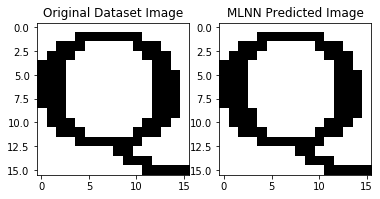

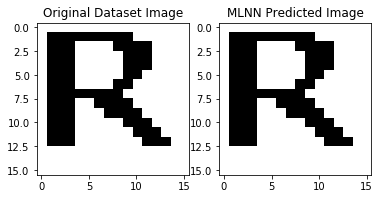

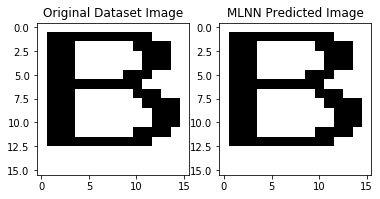

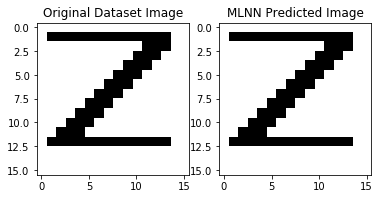

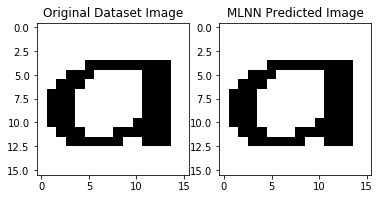

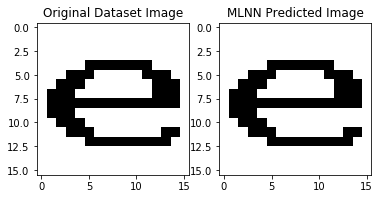

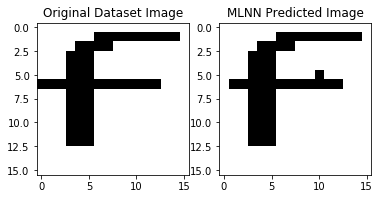

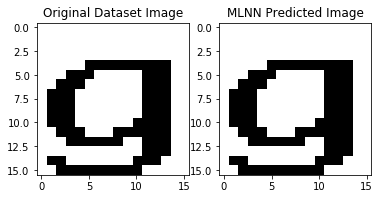

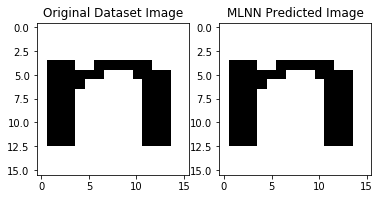

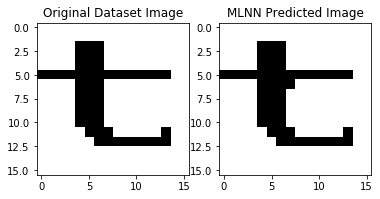

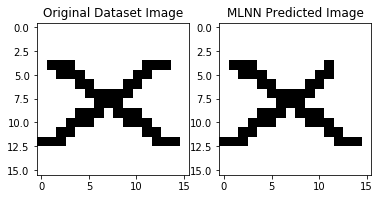

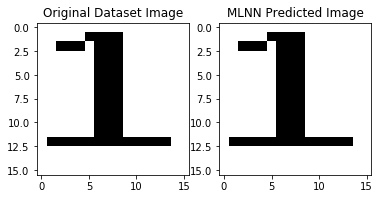

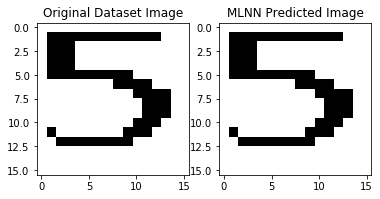

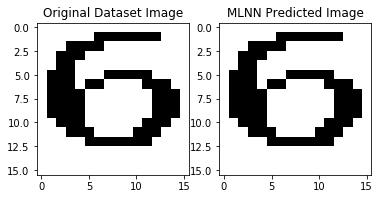

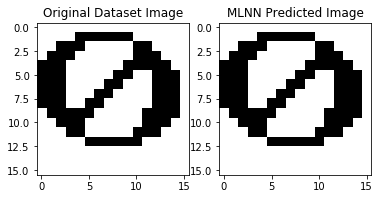

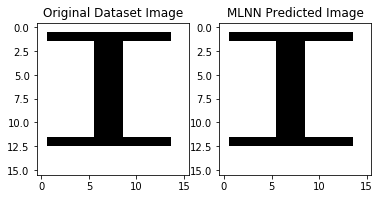

In [10]:
#predicting the output for given training data
y_pred = model.predict(X_train)
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_train = np.where(X_train<np.mean(X_train),0,1).astype('float64')
print(X_train.shape,y_pred.shape)
compare_results(X_train,y_pred)


(16, 1, 256) (16, 1, 256)


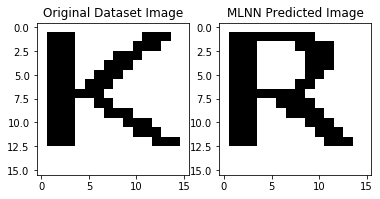

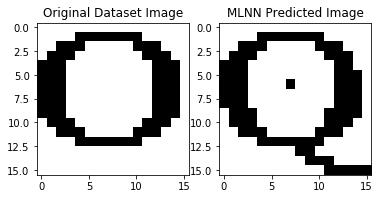

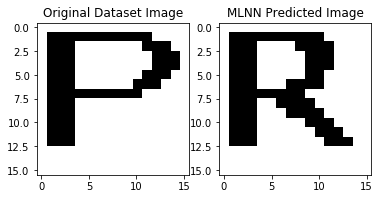

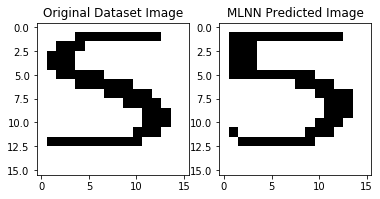

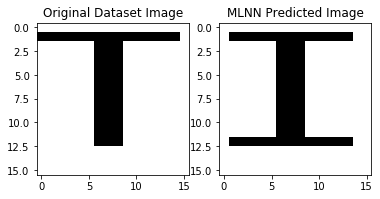

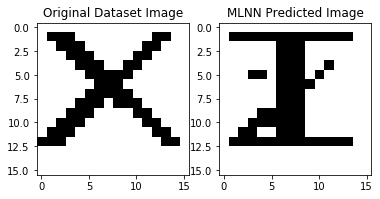

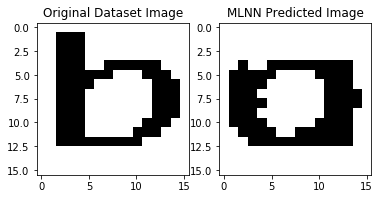

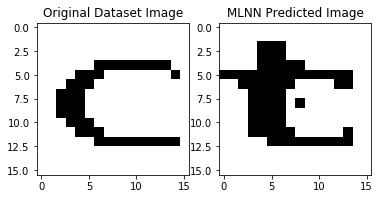

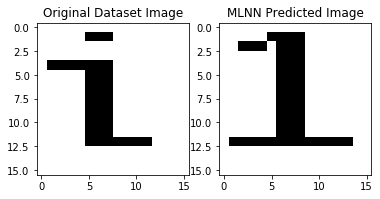

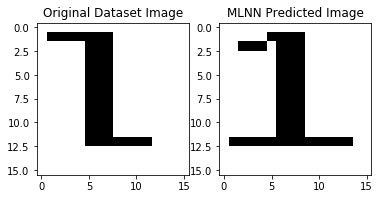

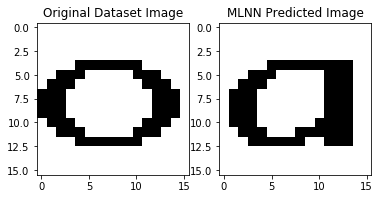

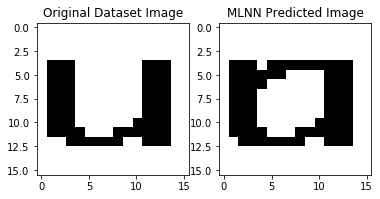

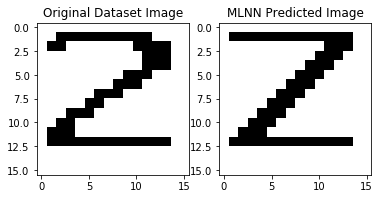

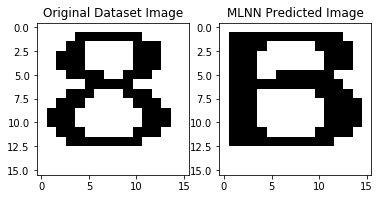

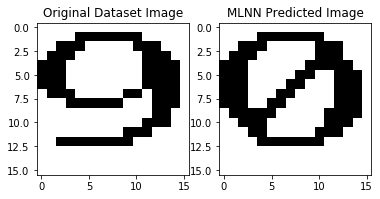

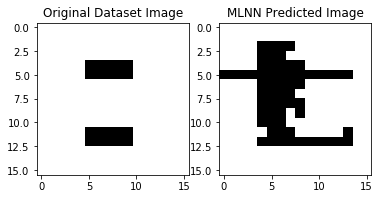

In [11]:
#predicting the output for given validation data
y_pred = model.predict(X_val)
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_val = np.where(X_val<np.mean(X_val),0,1).astype('float64')
print(X_val.shape,y_pred.shape)
compare_results(X_val,y_pred)

(33, 1, 256) (33, 1, 256)


/Users/carolnavya/anaconda3/envs/tenflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


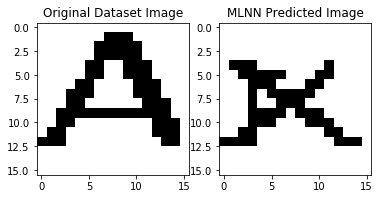

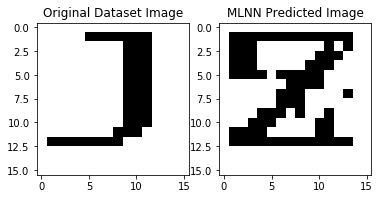

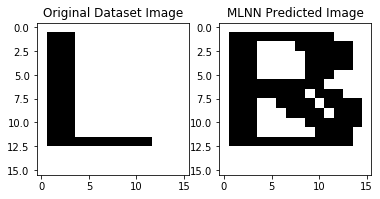

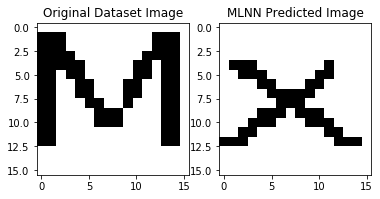

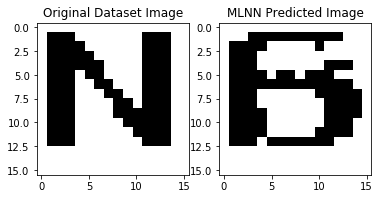

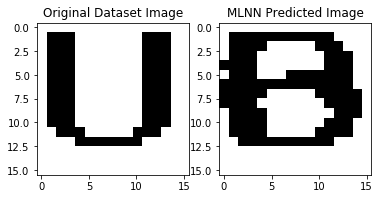

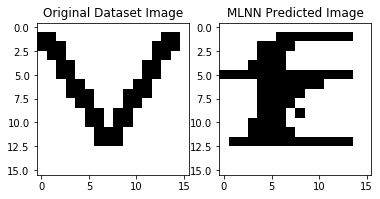

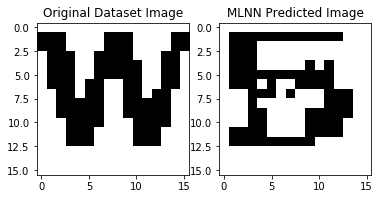

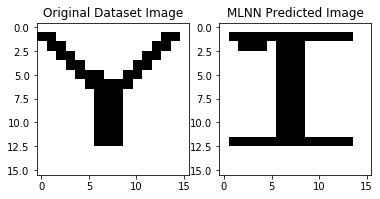

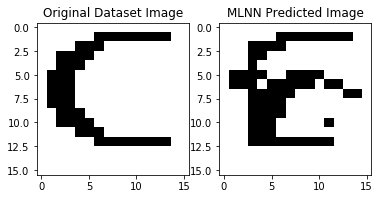

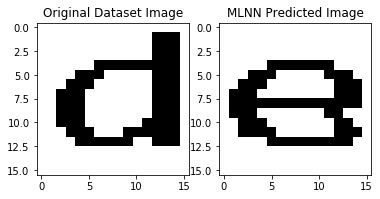

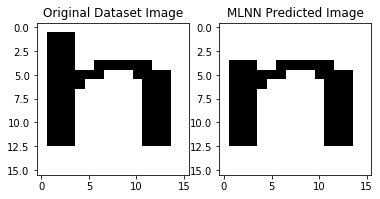

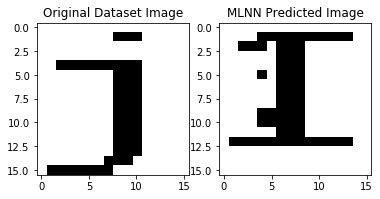

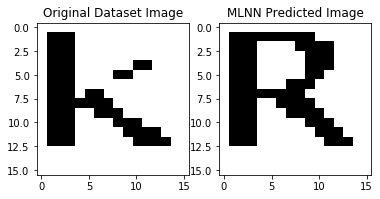

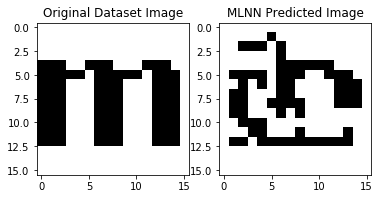

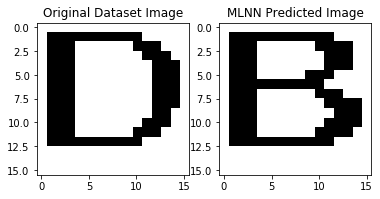

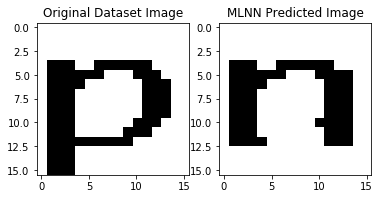

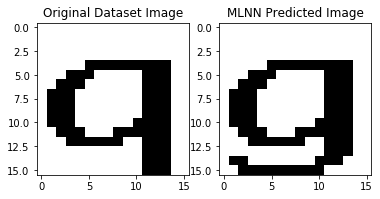

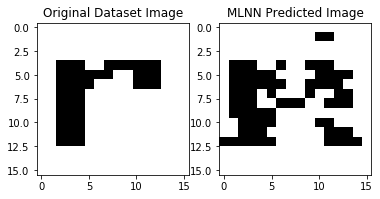

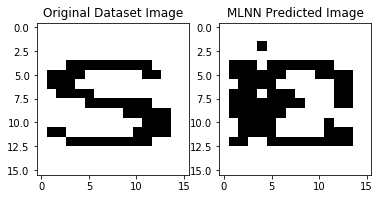

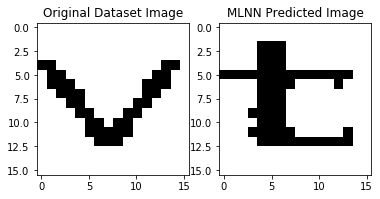

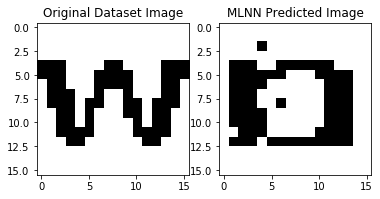

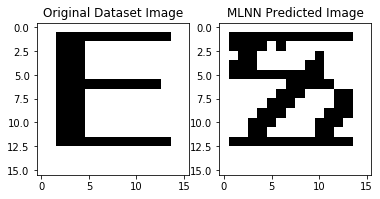

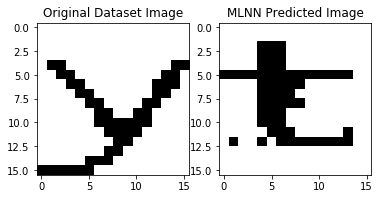

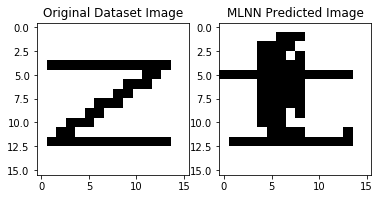

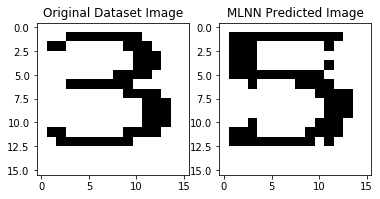

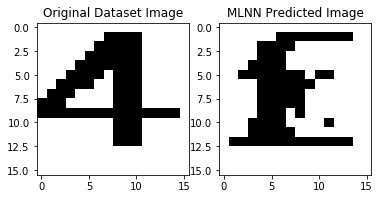

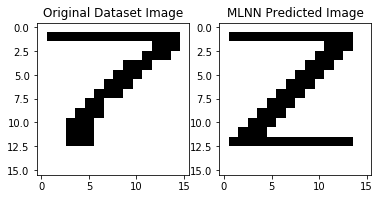

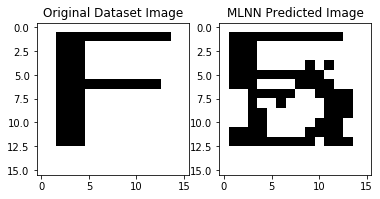

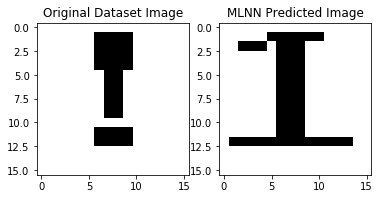

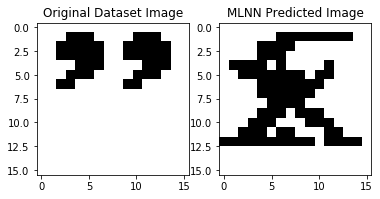

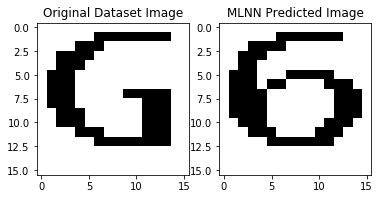

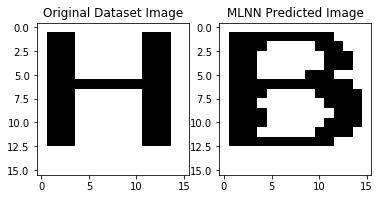

In [12]:
#predicting the output for given test data
y_pred = model.predict(X_test)
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
print(X_test.shape,y_pred.shape)
compare_results(X_test,y_pred)



# Noise corruption

In [13]:
def add_gaussian_noise(seed_no,stddev,img):
    """
    Adding gaussian noise to 10% of the image pixels
    stddev: standard deviation
    img: image that needs to be corrupted with noise
    """
    random.seed(seed_no)
    rand_idx=[]
    for i in range(0,25):
        random_index1=np.random.choice(16)
        random_index2=np.random.choice(16)
        rand_idx.append([random_index1,random_index2])
        #print([random_index1,random_index2])
    #len(rand_idx)
    noise_pixels = np.ones([16,16],dtype="float64")
    gauss_noise = np.random.normal(0.0,stddev*0.5, [16,16])
    for i in rand_idx:
        noise_pixels[i[0]][i[1]] = gauss_noise[i[0]][i[1]]
    noisy_img = noise_pixels+img
    noisy_img = np.where(noisy_img<noisy_img.mean(),0,1).astype('float64')
    return noisy_img

In [14]:
def add_noise(stddev,datadir):
    img_set = get_imageset("./imgset/test/")
    #print(img_set.shape)
    for i in range(img_set.shape[0]):
        #print(i)
        gaussy_img = add_gaussian_noise(16,stddev,img_set[i])
        plt.imsave(datadir+str(i)+'.jpg', gaussy_img)
        #print("saved")
        #plt.imshow(ll,cmap="gray")

In [15]:
stddev_dir={0:'./imgset/test/',0.1:'./imgset/noisy/dev1/',0.01:'./imgset/noisy/dev01/',0.02:'./imgset/noisy/dev02/',0.03:'./imgset/noisy/dev03/',0.05:'./imgset/noisy/dev05/',
           0.001:'./imgset/noisy/dev001/',0.002:'./imgset/noisy/dev002/',0.003:'./imgset/noisy/dev003/',0.005:'./imgset/noisy/dev005/'}


# Calculating ffh and ffa

In [16]:
def metric_calculation(test,pred):
    """
    test: original image
    pred: predicted image
    n_inp_zeros: no. of white pixels in the original image
    n_inp_ones: no. of black pixels in the predicted image
    n_out_zeros: no. of white pixels in the original image
    n_out_ones: no. of black pixels in the predicted image
    
    ff = no. of black pixels that OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of BLACK pixels in input image
    fha = no. of black pixels that DONOT OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of WHITE pixels in input image
    """
    ff = []
    fha = []
    #print(pred[0])
    for i in range(test.shape[0]):
        n_inp_zeros = (test[i]==0).sum()
        n_inp_ones = (test[i]==1).sum()
        n_out_zeros = (pred[i]==0).sum()
        n_out_ones = (pred[i]==1).sum()
        ## and operation i performed to find no of black pixels that occur coorectly
        #and_op = np.logical_and(test[i],pred[i]).astype('float64')
        right_ones = (np.logical_and(test[i],pred[i]).astype('float64')==1).sum()
        #print(right_ones,n_inp_ones)
        ff.append(round(right_ones/n_inp_ones,2))
        #print("shs",ff)
        fha.append(abs(round((n_out_ones-right_ones)/n_inp_zeros,2)))
        #print(n_inp_zeros,n_inp_ones,n_out_zeros,n_out_ones)
    return ff,fha

In [17]:
for std in stddev_dir:
    if std>0:
        add_noise(std,stddev_dir[std])
    X_test = get_imageset(stddev_dir[std])
    X_test = X_test.reshape(X_test.shape[0],1,256)
    y_pred = model.predict(X_test)
    yp = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
    xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')
    fh,ffa = metric_calculation(xt,yp)
    fh,ffa
    metric[std]=[fh,ffa]
print("DOne")

DOne


In [18]:
metric

{0: [[0.87,
   0.76,
   0.67,
   0.87,
   0.82,
   0.8,
   0.74,
   0.82,
   0.84,
   0.86,
   0.9,
   1.0,
   0.78,
   0.87,
   0.88,
   0.89,
   0.96,
   0.93,
   0.83,
   0.81,
   0.82,
   0.82,
   0.81,
   0.79,
   0.8,
   0.87,
   0.78,
   0.93,
   0.78,
   0.9,
   0.71,
   0.9,
   0.85],
  [0.61,
   0.36,
   0.0,
   0.74,
   0.3,
   0.05,
   0.56,
   0.45,
   0.43,
   0.27,
   0.36,
   0.13,
   0.67,
   0.12,
   0.45,
   0.11,
   0.22,
   0.05,
   0.19,
   0.33,
   0.56,
   0.43,
   0.29,
   0.73,
   0.35,
   0.25,
   0.58,
   0.09,
   0.26,
   0.12,
   0.55,
   0.19,
   0.1]],
 0.1: [[0.87,
   0.83,
   0.91,
   0.65,
   0.71,
   0.77,
   0.6,
   0.75,
   0.79,
   0.61,
   0.57,
   0.81,
   0.65,
   1.0,
   0.77,
   0.86,
   0.8,
   0.81,
   0.59,
   0.73,
   0.73,
   0.65,
   0.59,
   0.63,
   0.8,
   0.8,
   0.73,
   0.5,
   0.7,
   0.7,
   0.79,
   0.74,
   0.77,
   0.63,
   0.66,
   0.87,
   0.86,
   0.89,
   0.86,
   0.76,
   0.78,
   0.86,
   0.84,
   0.8,
   0.74,
   0.8,


# Plotting Graphs

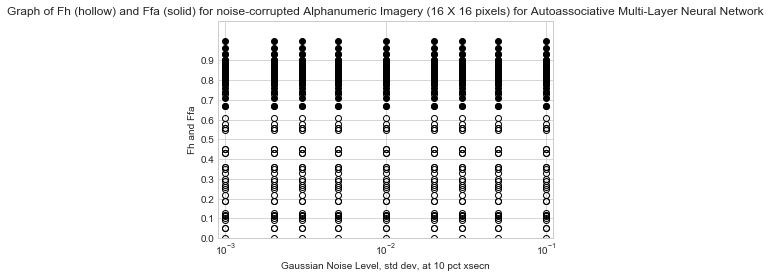

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

plt.style.use('seaborn-whitegrid')
for i in range(0,33):
    for std in stddev_dir:
        plt.plot(std,metric[0][0][i],'o',color='black') 
        plt.plot(std,metric[0][1][i],'o',color='black',markerfacecolor='none') 
#--------------The x axis is logarithmically scaled as mentioned in the  requirements----------------    
plt.xscale('log')
plt.yticks(np.arange(0,1,0.1))
plt.xlim([0.0009,0.1101])
plt.ylim([0,1.1])
#--------------Naming of the graph------------------
plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
plt.ylabel('Fh and Ffa')
plt.title('Graph of Fh (hollow) and Ffa (solid) for noise-corrupted Alphanumeric Imagery (16 X 16 pixels) for Autoassociative Multi-Layer Neural Network')
plt.show()

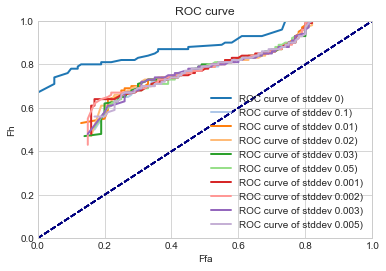

In [20]:
#ROC Curve
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78',
          '#2ca02c','#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
for std, color in zip(stddev_dir, colors):
    fh= metric[std][0]
    ffa = metric[std][1]
    fh.sort()
    ffa.sort()
    plt.plot(ffa,fh, color=color, lw=2,
             label='ROC curve of stddev {0})'
             ''.format(std))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Ffa')
    plt.ylabel('Fh')
    plt.title("ROC curve")
    plt.legend(loc="lower right")
   

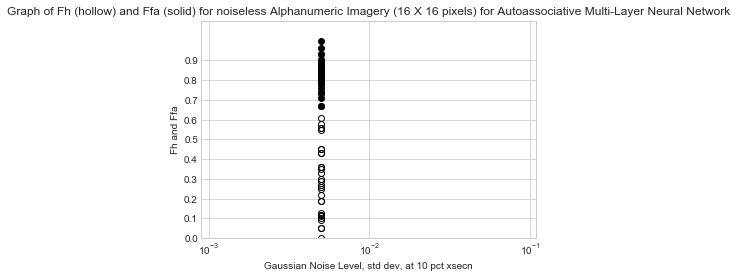

In [21]:
# graph for Fh anf Ffa for noiseless data
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

plt.style.use('seaborn-whitegrid')
for i in range(0,33):
    plt.plot(std,metric[0][0][i],'o',color='black') 
    plt.plot(std,metric[0][1][i],'o',color='black',markerfacecolor='none') 
#--------------The x axis is logarithmically scaled as mentioned in the  requirements----------------    
plt.xscale('log')
plt.yticks(np.arange(0,1,0.1))
plt.xlim([0.0009,0.1101])
plt.ylim([0,1.1])
#--------------Naming of the graph------------------
plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
plt.ylabel('Fh and Ffa')
plt.title('Graph of Fh (hollow) and Ffa (solid) for noiseless Alphanumeric Imagery (16 X 16 pixels) for Autoassociative Multi-Layer Neural Network')
plt.show()

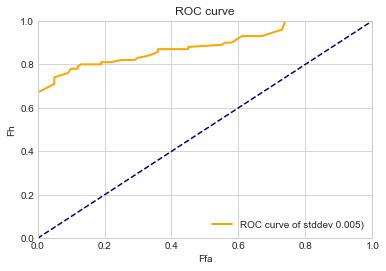

In [22]:
# ROC FOR NOISELESS DATA
fh= metric[0][0]
ffa = metric[0][1]
fh.sort()
ffa.sort()
plt.plot(ffa,fh, color='orange', lw=2,
             label='ROC curve of stddev {0})'
             ''.format(std))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ffa')
plt.ylabel('Fh')
plt.title("ROC curve")
plt.legend(loc="lower right")